In [79]:
# Importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
population_df = pd.read_csv('PEA01.20231009T211038.csv')

In [81]:
#using the pandas read_csv function we will get a DataFrame object. A DataFrame is a two-dimensional, size-mutable,
# population_df = pd.read_csv(path)

In [82]:
#checking the first 5 rows of the data so that we can get idea of the dataset
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,293.8
1,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,1,Male,Thousand,149.2
2,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,2,Female,Thousand,144.6
3,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,-,Both sexes,Thousand,278.9
4,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,1,Male,Thousand,142.3
5,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,2,Female,Thousand,136.6
6,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,-,Both sexes,Thousand,262.1
7,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,1,Male,Thousand,133.4
8,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,2,Female,Thousand,128.7
9,PEA01,Population Estimates (Persons in April),1950,1950,300,15 - 19 years,-,Both sexes,Thousand,244.0


In [83]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        3996 non-null   object 
 1   STATISTIC Label  3996 non-null   object 
 2   TLIST(A1)        3996 non-null   int64  
 3   Year             3996 non-null   int64  
 4   C02076V02508     3996 non-null   int64  
 5   Age Group        3996 non-null   object 
 6   C02199V02655     3996 non-null   object 
 7   Sex              3996 non-null   object 
 8   UNIT             3996 non-null   object 
 9   VALUE            3885 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 312.3+ KB


In [84]:
#we will clean some of the columns as they won't be useful for our analysis

to_drop = ['STATISTIC', 'TLIST(A1)', 'C02076V02508', 'C02199V02655']

population_df.drop(to_drop, inplace=True, axis=1)


In [85]:
population_df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,293.8
1,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,149.2
2,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,144.6
3,Population Estimates (Persons in April),1950,5 - 9 years,Both sexes,Thousand,278.9
4,Population Estimates (Persons in April),1950,5 - 9 years,Male,Thousand,142.3


In [86]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [87]:
#we will be looking at the data only for the past 23 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] >2000)]

In [88]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
2754,Population Estimates (Persons in April),2001,0 - 4 years,Both sexes,Thousand,273.2
2755,Population Estimates (Persons in April),2001,0 - 4 years,Male,Thousand,140.4
2756,Population Estimates (Persons in April),2001,0 - 4 years,Female,Thousand,133.0
2757,Population Estimates (Persons in April),2001,5 - 9 years,Both sexes,Thousand,263.7
2758,Population Estimates (Persons in April),2001,5 - 9 years,Male,Thousand,135.5


In [89]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [90]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex     VALUE
0  Both sexes  105185.8
1      Female   52984.9
2        Male   52202.6


In [91]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex   VALUE
0   2001  Both sexes  3847.0
1   2001      Female  1934.3
2   2001        Male  1913.2
3   2002  Both sexes  3917.2
4   2002      Female  1971.1
..   ...         ...     ...
64  2022      Female  2621.9
65  2022        Male  2561.8
66  2023  Both sexes  5281.6
67  2023      Female  2675.4
68  2023        Male  2605.9

[69 rows x 3 columns]


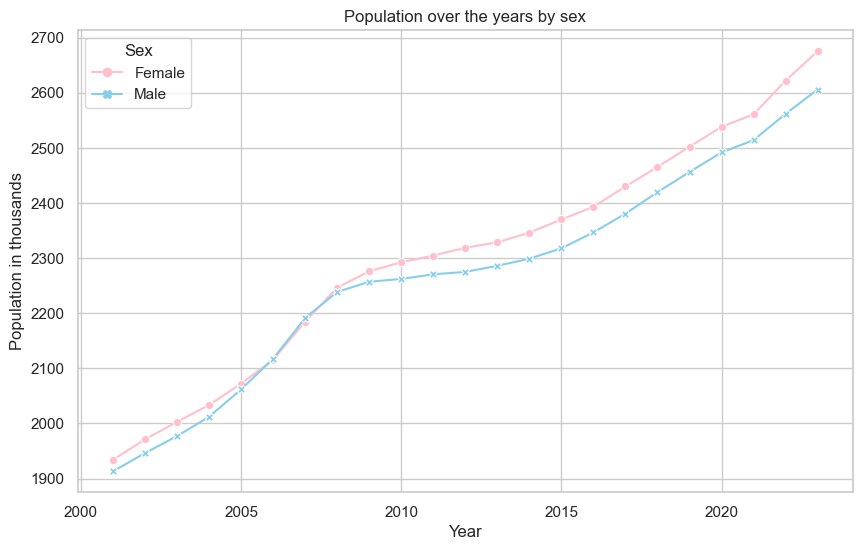

In [108]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

# Show the plot
plt.legend(title='Sex')
plt.show()

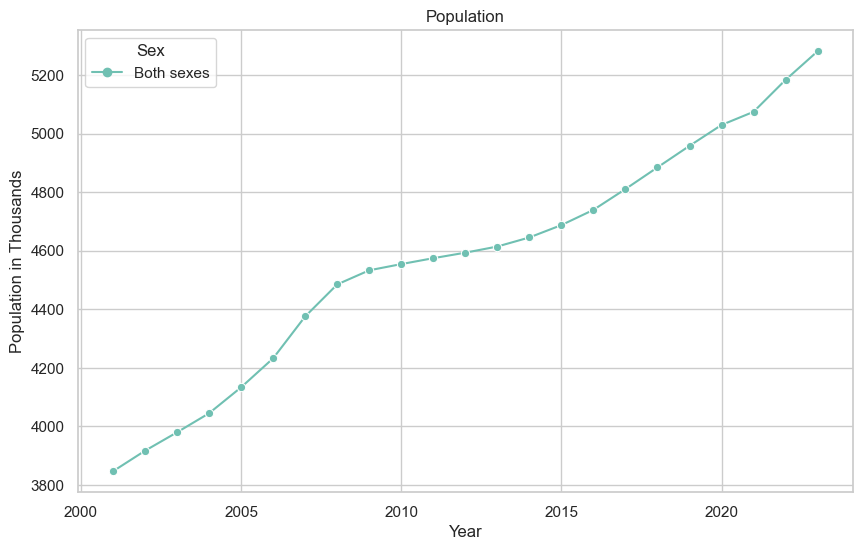

In [131]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

# Show the plot
plt.legend(title='Sex')
plt.show()